# Lang compositional analysis

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
from pathlib import Path
import sys

sys.path.insert(1, str(Path().cwd().parent))
import common_config

In [3]:
common_config.figure_journal_basic()

In [4]:
import pertpy as pt
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [5]:
adata = sc.read_h5ad("230114_hPCLS_perturbation.h5ad")

In [6]:
adata

AnnData object with n_obs × n_vars = 63581 × 17343
    obs: 'condition', 'modality', 'patient', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group', 'sample'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'QC_group_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'modality_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'timepoint_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connectivities', 'distances'

In [7]:
adata.obs

condition modality patient treatment  \
muc31175_AAACCCAAGATCCCGC  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCAAGTAAAGCT  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCACAAGTTGGG  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCACACCAAAGG  Fibrotic Cocktail     PCLS       2        FC   
muc31175_AAACCCACACCTCGTT  Fibrotic Cocktail     PCLS       2        FC   
...                                      ...      ...     ...       ...   
muc24279_TTTGATCGTTAGTCGT  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGATCGTTCCCACT  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGGAGCACGATAGG  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGTTGCAAGACAAT  Fibrotic Cocktail     PCLS       1        FC   
muc24279_TTTGTTGTCGATACGT  Fibrotic Cocktail     PCLS       1        FC   

                          identifier  n_counts  n_genes  percent_mito  \
muc31175_AAACCCAAGATCCCGC   muc31175     735.0      481      0.073469   
muc31175_AAACCCAAGTAAAGCT   muc31175    4782.0     2074      0.035968   
muc31175_AAACCCACAAGTTGGG   muc31175    1304.0      773      0.007669   
muc31175_AAACCCACACCAAAGG   muc31175    1986.0     1118      0.043807   
muc31175_AAACCCACACCTCGTT   muc31175    2049.0      986      0.060517   
...                              ...       ...      ...           ...   
muc24279_TTTGATCGTTAGTCGT   muc24279   10589.0     3476      0.014166   
muc24279_TTTGATCGTTCCCACT   muc24279     658.0      438      0.004559   
muc24279_TTTGGAGCACGATAGG   muc24279    5930.0     2419      0.037605   
muc24279_TTTGTTGCAAGACAAT   muc24279    2786.0     1487      0.045226   
muc24279_TTTGTTGTCGATACGT   muc24279    9054.0     3493      0.071571   

                          QC_group  doublet_scores  size_factors leiden_1  \
muc31175_AAACCCAAGATCCCGC      low        0.051087      0.101679        0   
muc31175_AAACCCAAGTAAAGCT      low        0.020891      0.772610        4   
muc31175_AAACCCACAAGTTGGG      low        0.027234      0.188760        1   
muc31175_AAACCCACACCAAAGG      low        0.164641      0.300193        1   
muc31175_AAACCCACACCTCGTT      low        0.138672      0.283763       21   
...                            ...             ...           ...      ...   
muc24279_TTTGATCGTTAGTCGT   medium        0.050000      1.779824        2   
muc24279_TTTGATCGTTCCCACT   medium        0.047490      0.107031       17   
muc24279_TTTGGAGCACGATAGG   medium        0.038509      0.972865       15   
muc24279_TTTGTTGCAAGACAAT   medium        0.042802      0.472818       19   
muc24279_TTTGTTGTCGATACGT   medium        0.036496      1.735684        4   

                          leiden_2     cell_type cell_type_group sample  
muc31175_AAACCCAAGATCCCGC        7       T cells         T cells   FC_2  
muc31175_AAACCCAAGTAAAGCT        2    ectopic EC     vascular EC   FC_2  
muc31175_AAACCCACAAGTTGGG        0    Mast cells      Mast cells   FC_2  
muc31175_AAACCCACACCAAAGG        0    Mast cells      Mast cells   FC_2  
muc31175_AAACCCACACCTCGTT       33       B cells         B cells   FC_2  
...                            ...           ...             ...    ...  
muc24279_TTTGATCGTTAGTCGT        5  capillary EC    capillary EC   FC_1  
muc24279_TTTGATCGTTCCCACT       18   Fibroblasts     Fibroblasts   FC_1  
muc24279_TTTGGAGCACGATAGG       14     Pericytes   SMC/Pericytes   FC_1  
muc24279_TTTGTTGCAAGACAAT       20    Mast cells      Mast cells   FC_1  
muc24279_TTTGTTGTCGATACGT        2    ectopic EC     vascular EC   FC_1  

[63581 rows x 16 columns]

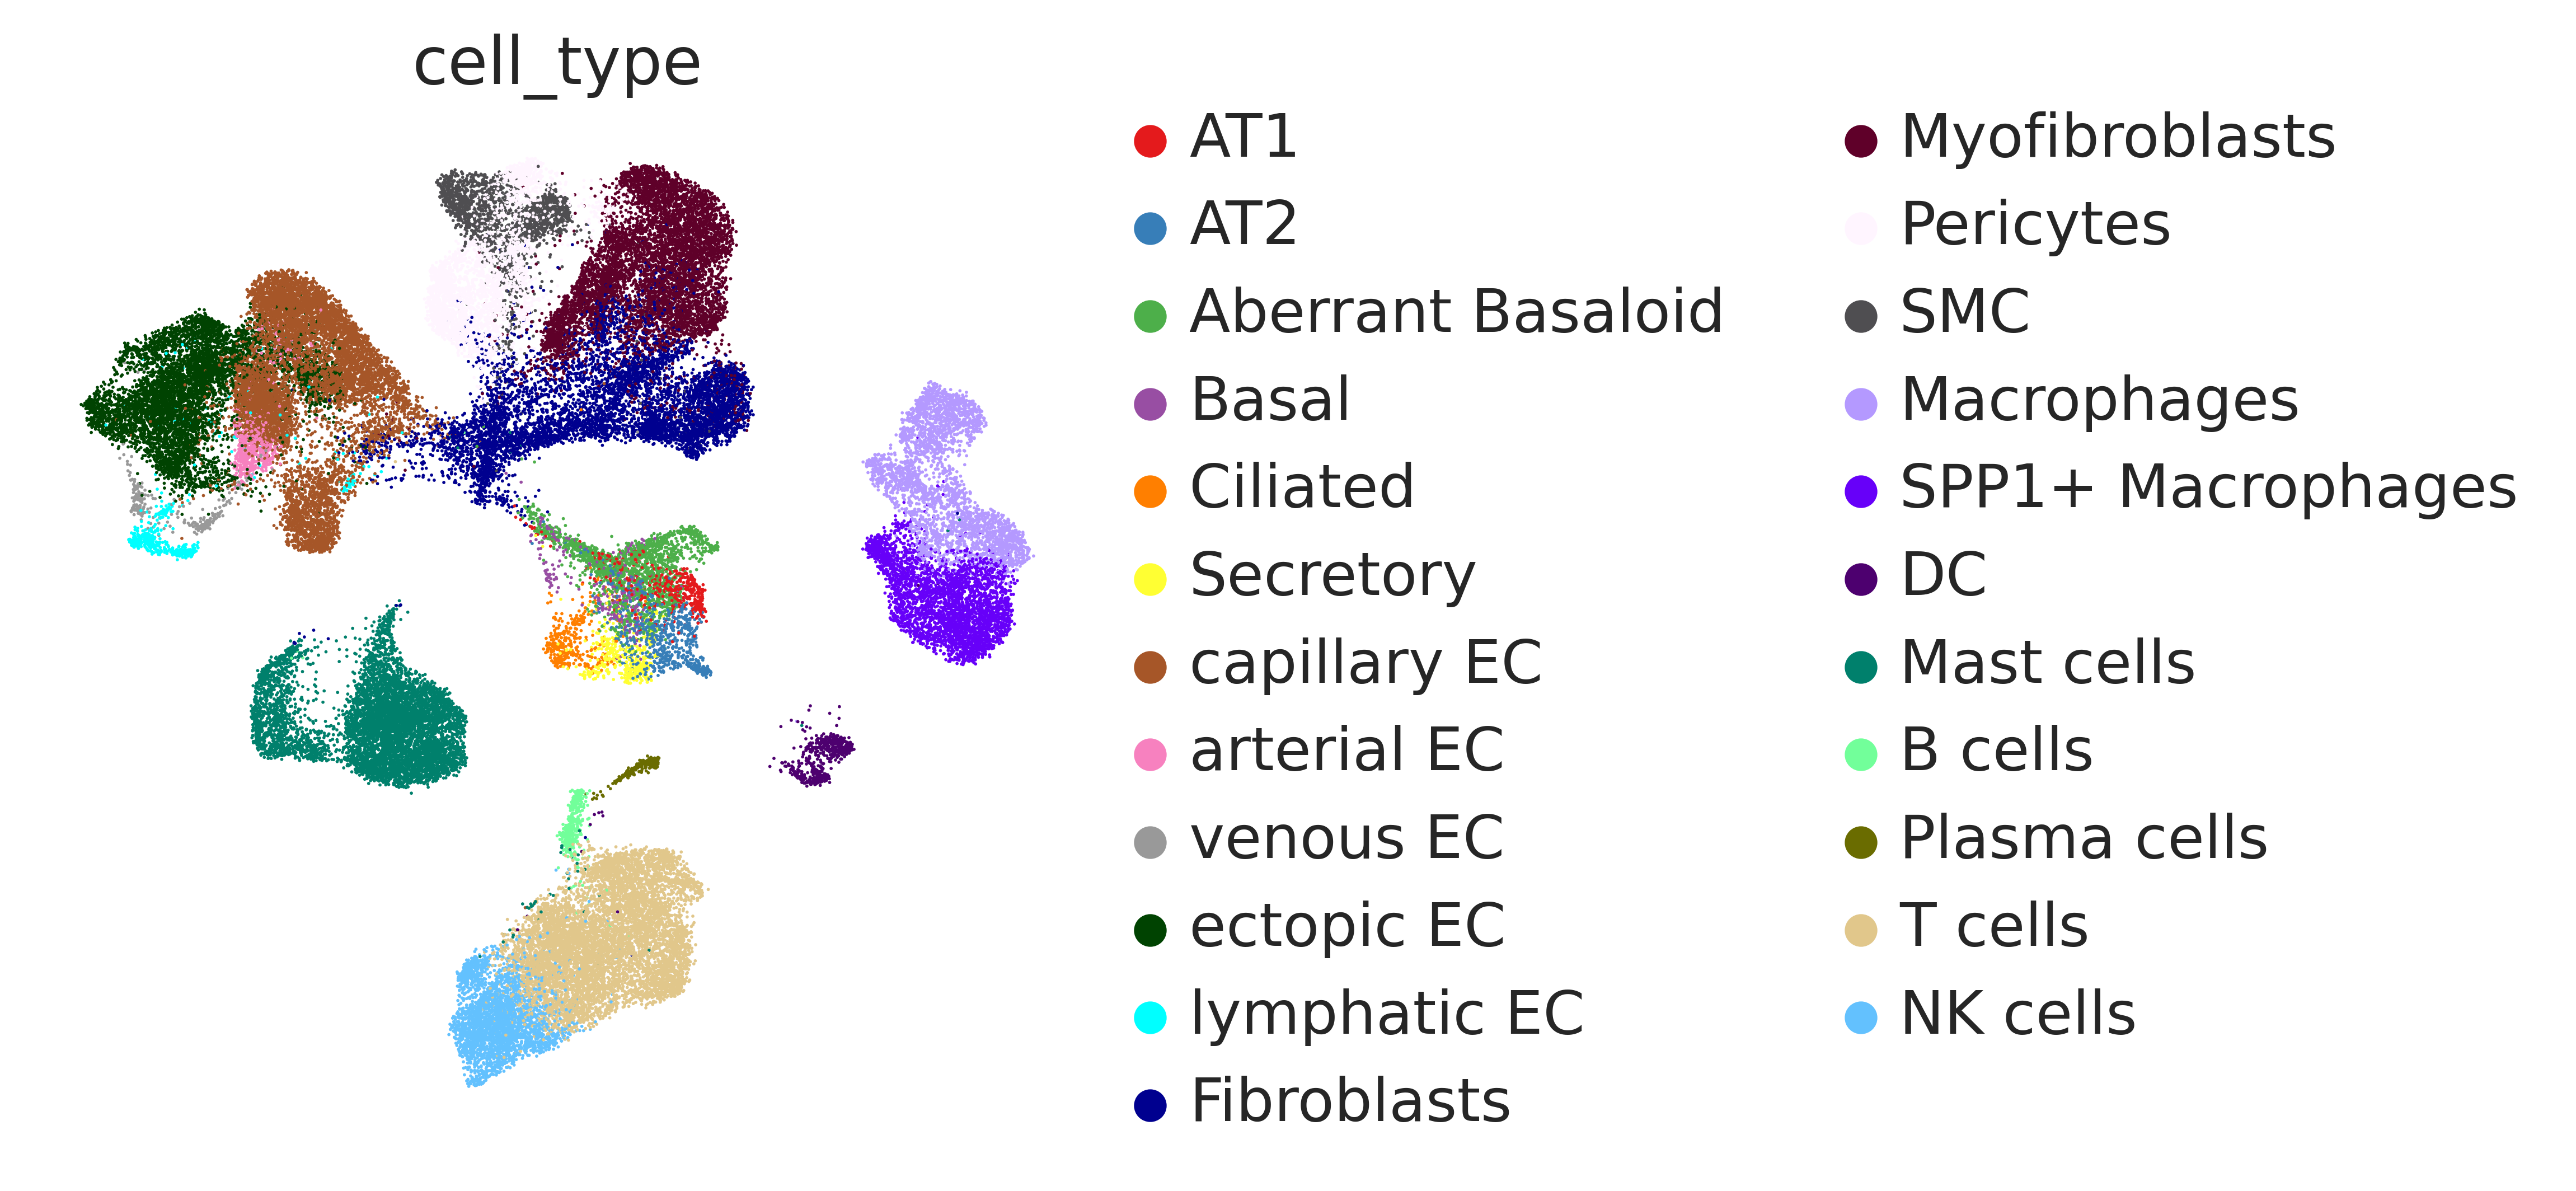

In [8]:
sc.pl.umap(adata, color="cell_type")

## scCODA

In [9]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="cell_type",
    sample_identifier="sample",
    covariate_obs=["treatment"],
)

In [10]:
sccoda_data

MuData object with n_obs × n_vars = 63589 × 17366
  var:	'n_cells'
  2 modalities
    rna:	63581 x 17343
      obs:	'condition', 'modality', 'patient', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'cell_type', 'cell_type_group', 'sample'
      var:	'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'QC_group_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'dendrogram_cell_type', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'modality_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sample_colors', 'timepoint_colors', 'treatment_colors', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'unsouped_counts'
      obsp:	'connectivities', 'distances'
    coda:	8 x 23
      obs:	'condition', 'modality', 'patient', 'treatment'
      var:	'n_cells'

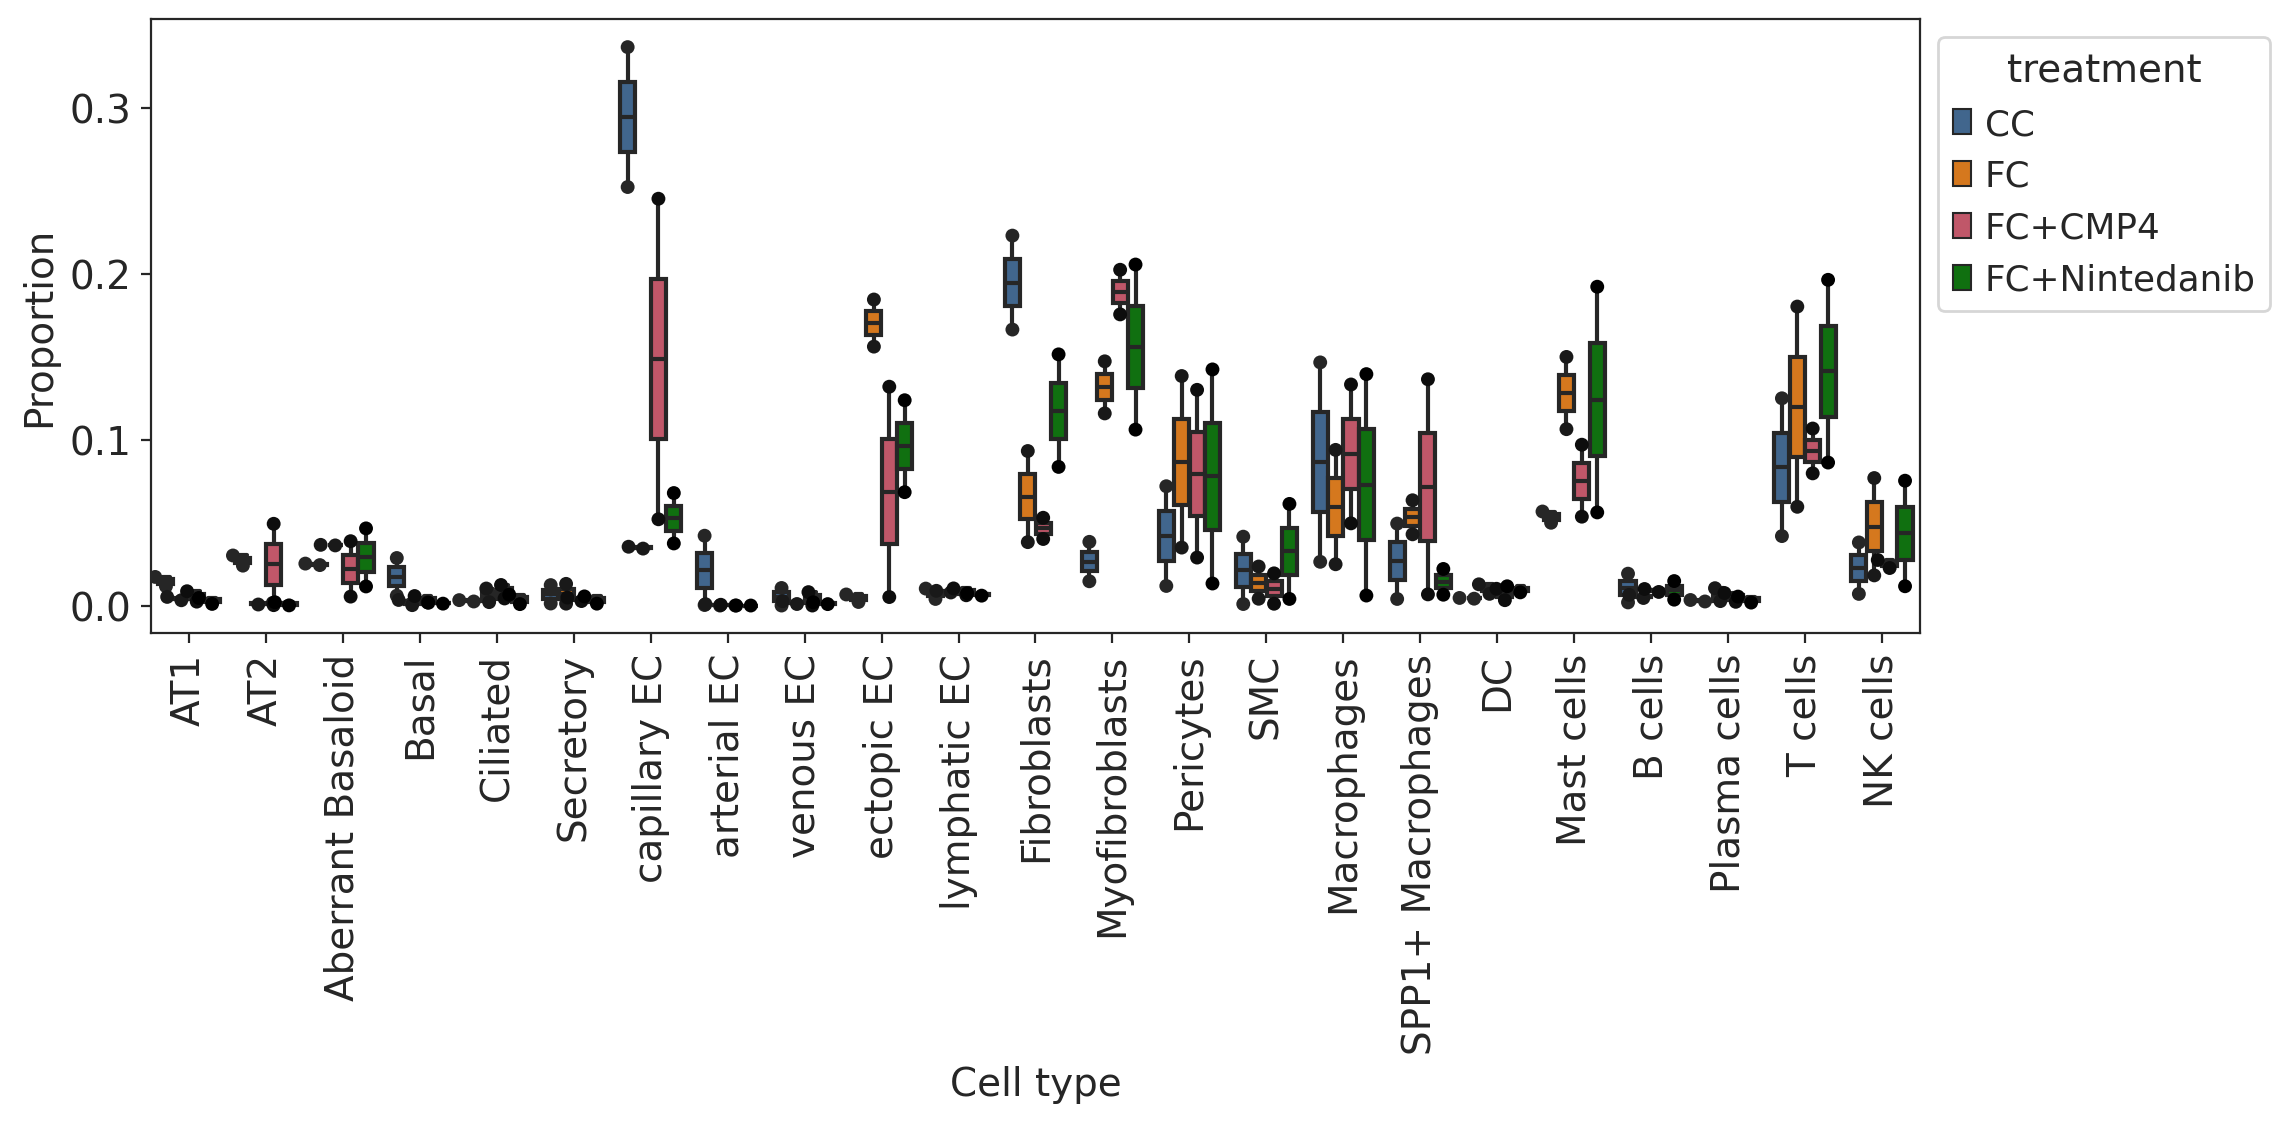

In [12]:
palette = {
    "CC": common_config.pt_blue,
    "FC": common_config.pt_orange,
    "FC+CMP4": common_config.pt_red,
    "FC+Nintedanib": "green",
}

sccoda_model.plot_boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="treatment",
    add_dots=True,
    cmap=palette,
)
fig = plt.gcf()
fig.set_size_inches(30, 10)
plt.savefig("figures/compositional_boxplot_umap.png", bbox_inches="tight")

In [13]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="treatment",
    reference_cell_type="automatic",
)

Automatic reference selection! Reference cell type set to lymphatic EC

Zero counts encountered in data! Added a pseudocount of 0.5.

In [14]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda")

sample: 100%|██████████| 11000/11000 [02:15<00:00, 81.39it/s, 255 steps of size 2.46e-02. acc. prob=0.90] 


In [15]:
sccoda_model.set_fdr(sccoda_data, modality_key="coda", est_fdr=0.3)
sccoda_model.summary(sccoda_data, modality_key="coda")

                                          Compositional Analysis summary                                           
┌─────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┐
│ Name                                        │ Value                                                             │
├─────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Data                                        │ Data: 8 samples, 23 cell types                                    │
│ Reference cell type                         │ lymphatic EC                                                      │
│ Formula                                     │ treatment                                                         │
└─────────────────────────────────────────────┴───────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                    Final Parameter  Expected Sample                                                             │
│ Cell Type                                                                                                       │
│ AT1                    -0.701           125.220                                                                 │
│ AT2                    -0.934            99.193                                                                 │
│ Aberrant Basaloid       0.122           285.166                                                                 │
│ Basal                  -0.912           101.400                                                                 │
│ Ciliated               -0.820           111.171                                                                 │
│ Secretory              -0.868           105.961                                                                 │
│ capillary EC            1.444          1069.634                                                                 │
│ arterial EC            -1.526            54.876                                                                 │
│ venous EC              -1.200            76.026                                                                 │
│ ectopic EC              0.262           328.019                                                                 │
│ lymphatic EC           -0.515           150.818                                                                 │
│ Fibroblasts             1.263           892.541                                                                 │
│ Myofibroblasts          1.145           793.198                                                                 │
│ Pericytes               0.638           477.743                                                                 │
│ SMC                    -0.490           154.636                                                                 │
│ Macrophages             0.744           531.165                                                                 │
│ SPP1+ Macrophages       0.078           272.891                                                                 │
│ DC                     -0.574           142.177                                                                 │
│ Mast cells              1.084           746.259                                                                 │
│ B cells                -0.569           142.890                                                                 │
│ Plasma cells           -0.831           109.955                                                                 │
│ T cells                 1.243           874.867                                                                 │
│ NK cells                0.180           302.195                                                                 │
└─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                             Final Parameter  Expected Sample  log2-fold change                  │
│ Covariate                Cell Type                                                                              │
│ treatmentT.FC            AT1                     0.000           122.256           -0.035                       │
│                          AT2                     0.000            96.846           -0.035                       │
│                          Aberrant Basaloid       0.000           278.416           -0.035                       │
│                          Basal                   0.000            99.000           -0.035                       │
│                          Ciliated                0.000           108.540           -0.035                       │
│                          Secretory               0.000           103.453           -0.035                       │
│                          capillary EC           -0.734           501.197           -1.094                       │
│                          arterial EC             0.000            53.577           -0.035                       │
│                          venous EC               0.000            74.226           -0.035                       │
│                          ectopic EC              1.189          1051.505            1.681                       │
│                          lymphatic EC            0.000           147.248           -0.035                       │
│                          Fibroblasts             0.000           871.414           -0.035                       │
│                          Myofibroblasts          0.000           774.422           -0.035                       │
│                          Pericytes               0.000           466.434           -0.035                       │
│                          SMC                     0.000           150.975           -0.035                       │
│                          Macrophages             0.000           518.592           -0.035                       │
│                          SPP1+ Macrophages       0.000           266.432           -0.035                       │
│                          DC                      0.000           138.812           -0.035                       │
│                          Mast cells              0.000           728.595           -0.035                       │
│                          B cells                 0.000           139.507           -0.035                       │
│                          Plasma cells            0.000           107.352           -0.035                       │
│                          T cells                 0.000           854.159           -0.035                       │
│                          NK cells                0.000           295.042           -0.035                       │
│ treatmentT.FC+CMP4       AT1                     0.000           123.439           -0.021                       │
│                          AT2                     0.000            97.783           -0.021                       │
│                          Aberrant Basaloid       0.000           281.111           -0.021                       │
│                          Basal                   0.000            99.958           -0.021                       │
│                          Ciliated                0.000           109.590           -0.021                       │
│                          Secretory               0.000           104.454           -0.021                       │
│                          capillary EC            0.000

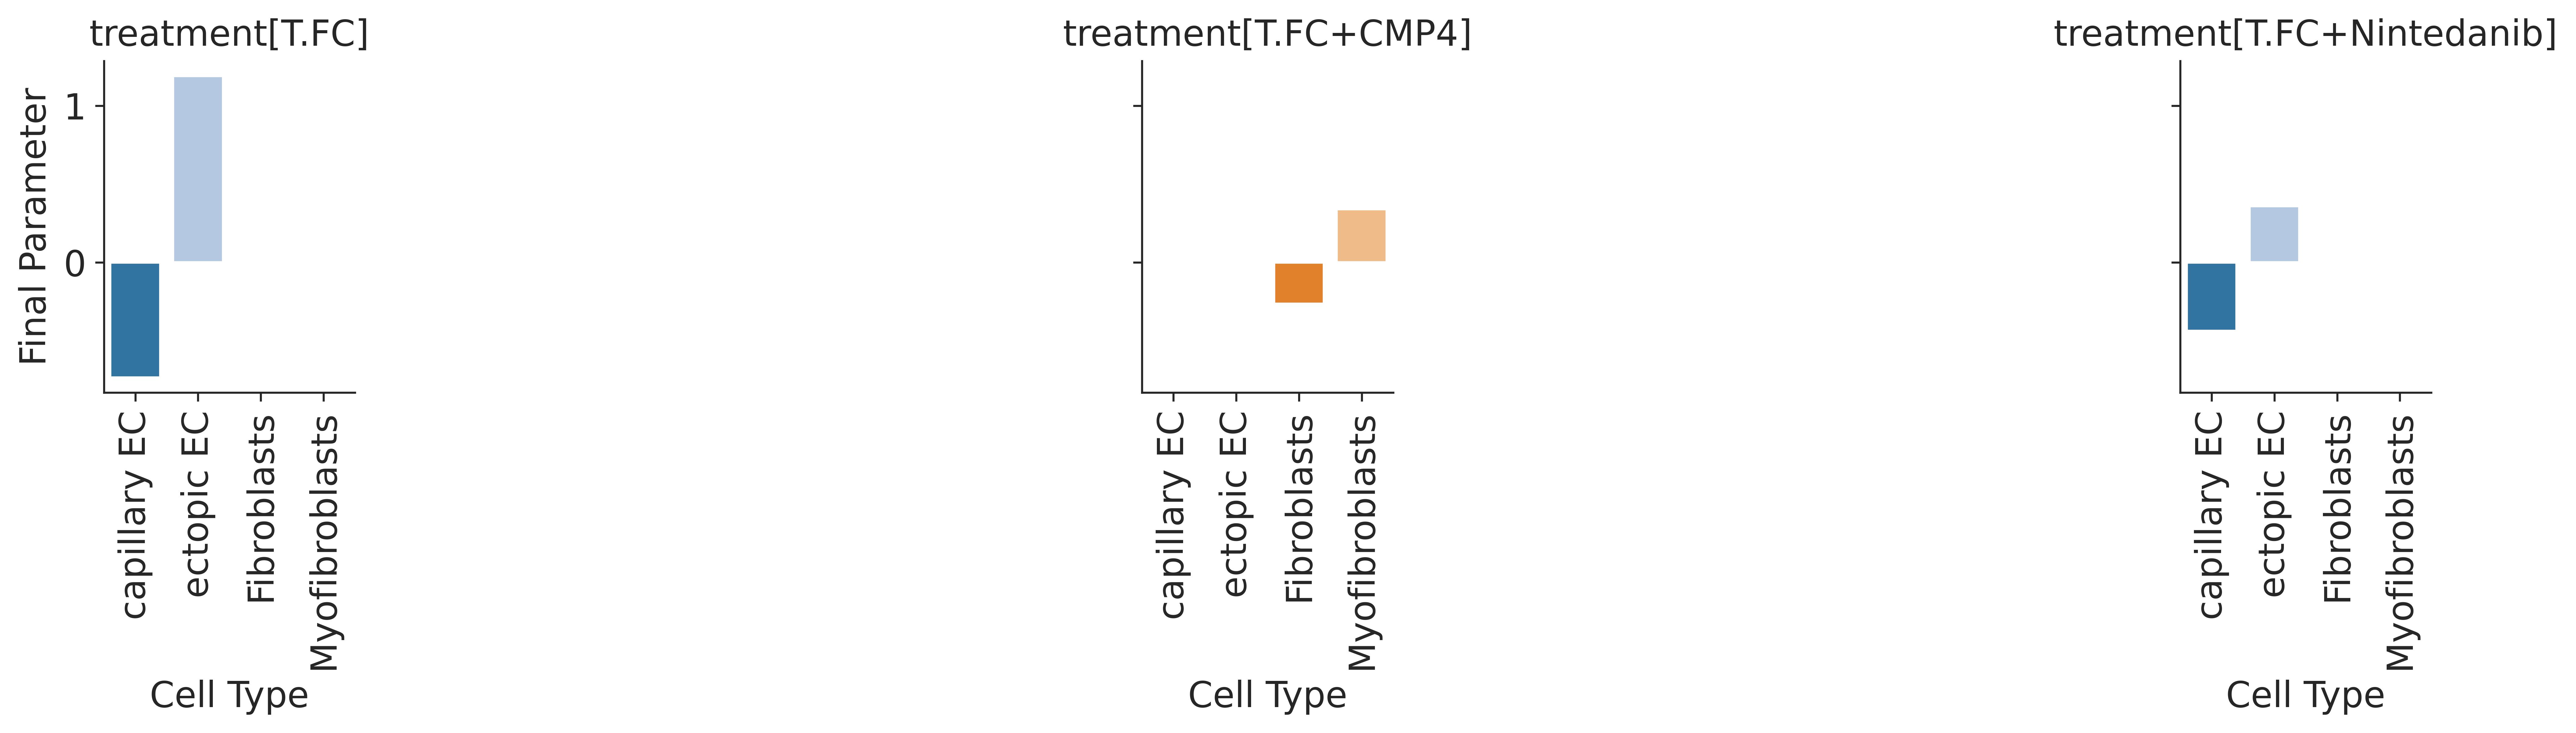

In [16]:
sccoda_model.plot_effects_barplot(
    sccoda_data, modality_key="coda", parameter="Final Parameter"
)
plt.savefig("figures/effects_barplot_final_parameter.png", bbox_inches="tight")

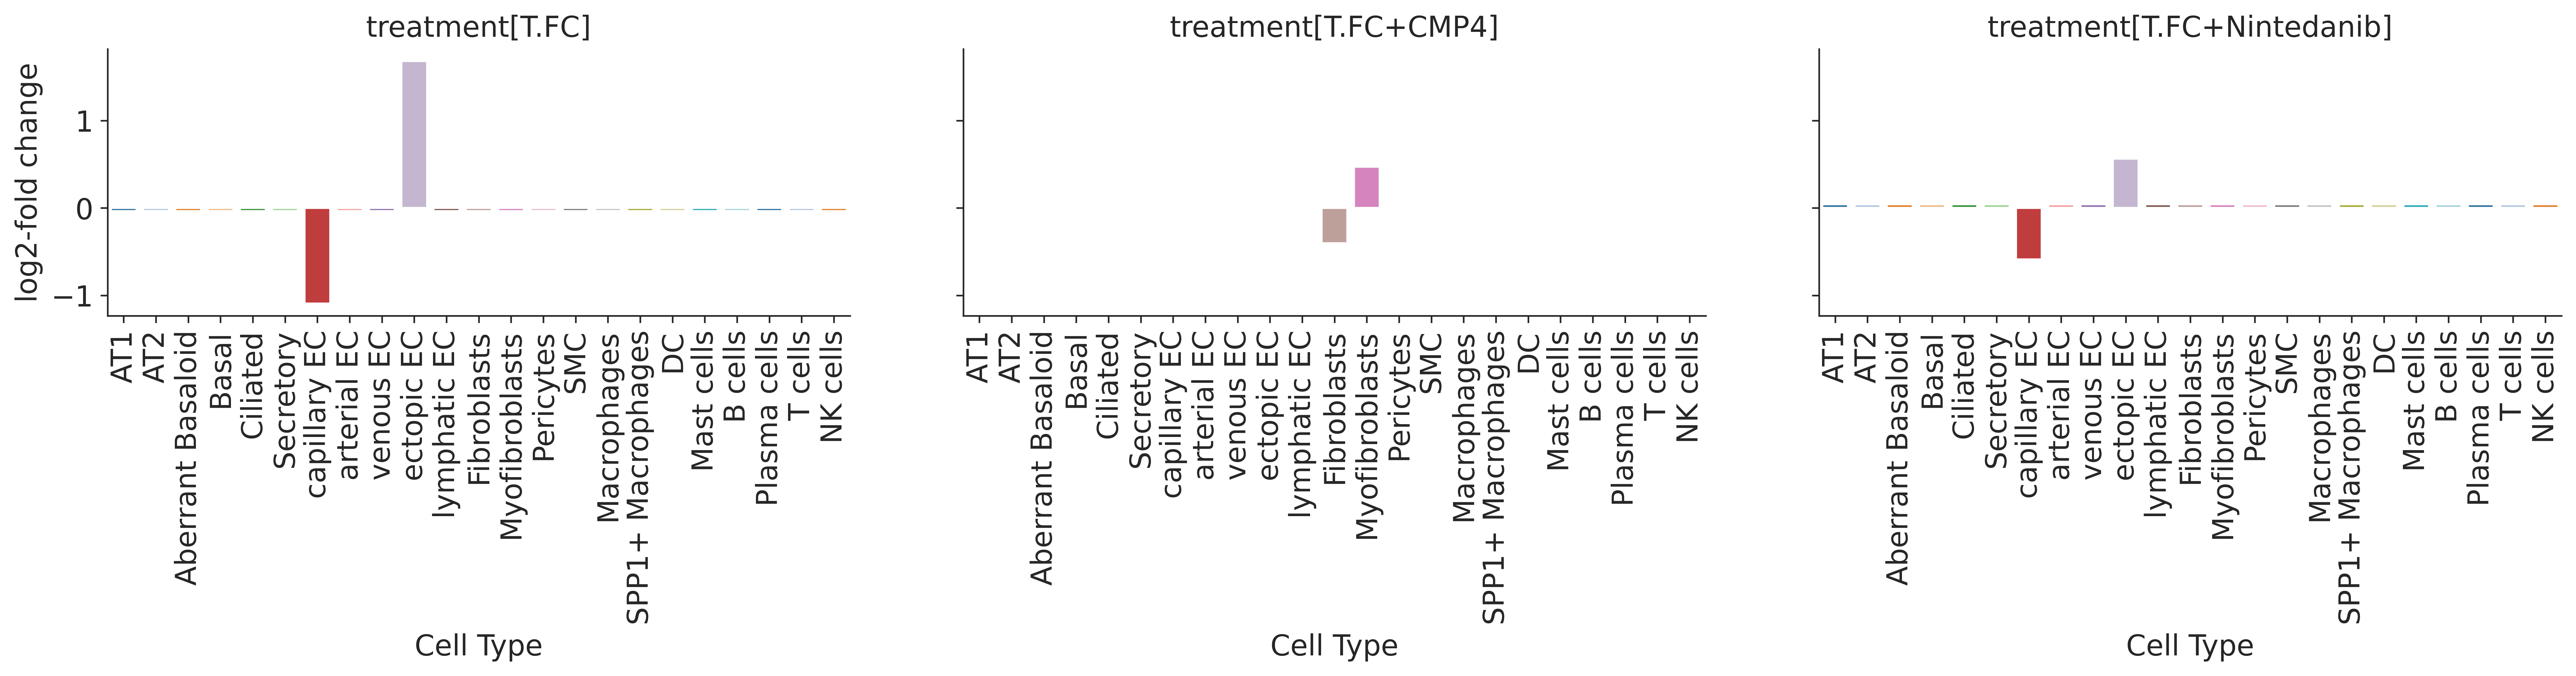

In [17]:
sccoda_model.plot_effects_barplot(
    sccoda_data, modality_key="coda", parameter="log2-fold change"
)
plt.savefig("figures/final_parameter_boxplot_log2fc.png", bbox_inches="tight")

## MILO

In [18]:
milo = pt.tl.Milo()
milo_data = milo.load(adata)

In [19]:
milo.make_nhoods(milo_data["rna"], prop=0.1)

In [20]:
print(f"Number of neighborhoods: {milo_data['rna'].obsm['nhoods'].shape[1]}")

Number of neighborhoods: 4408


Text(0, 0.5, '# nhoods')

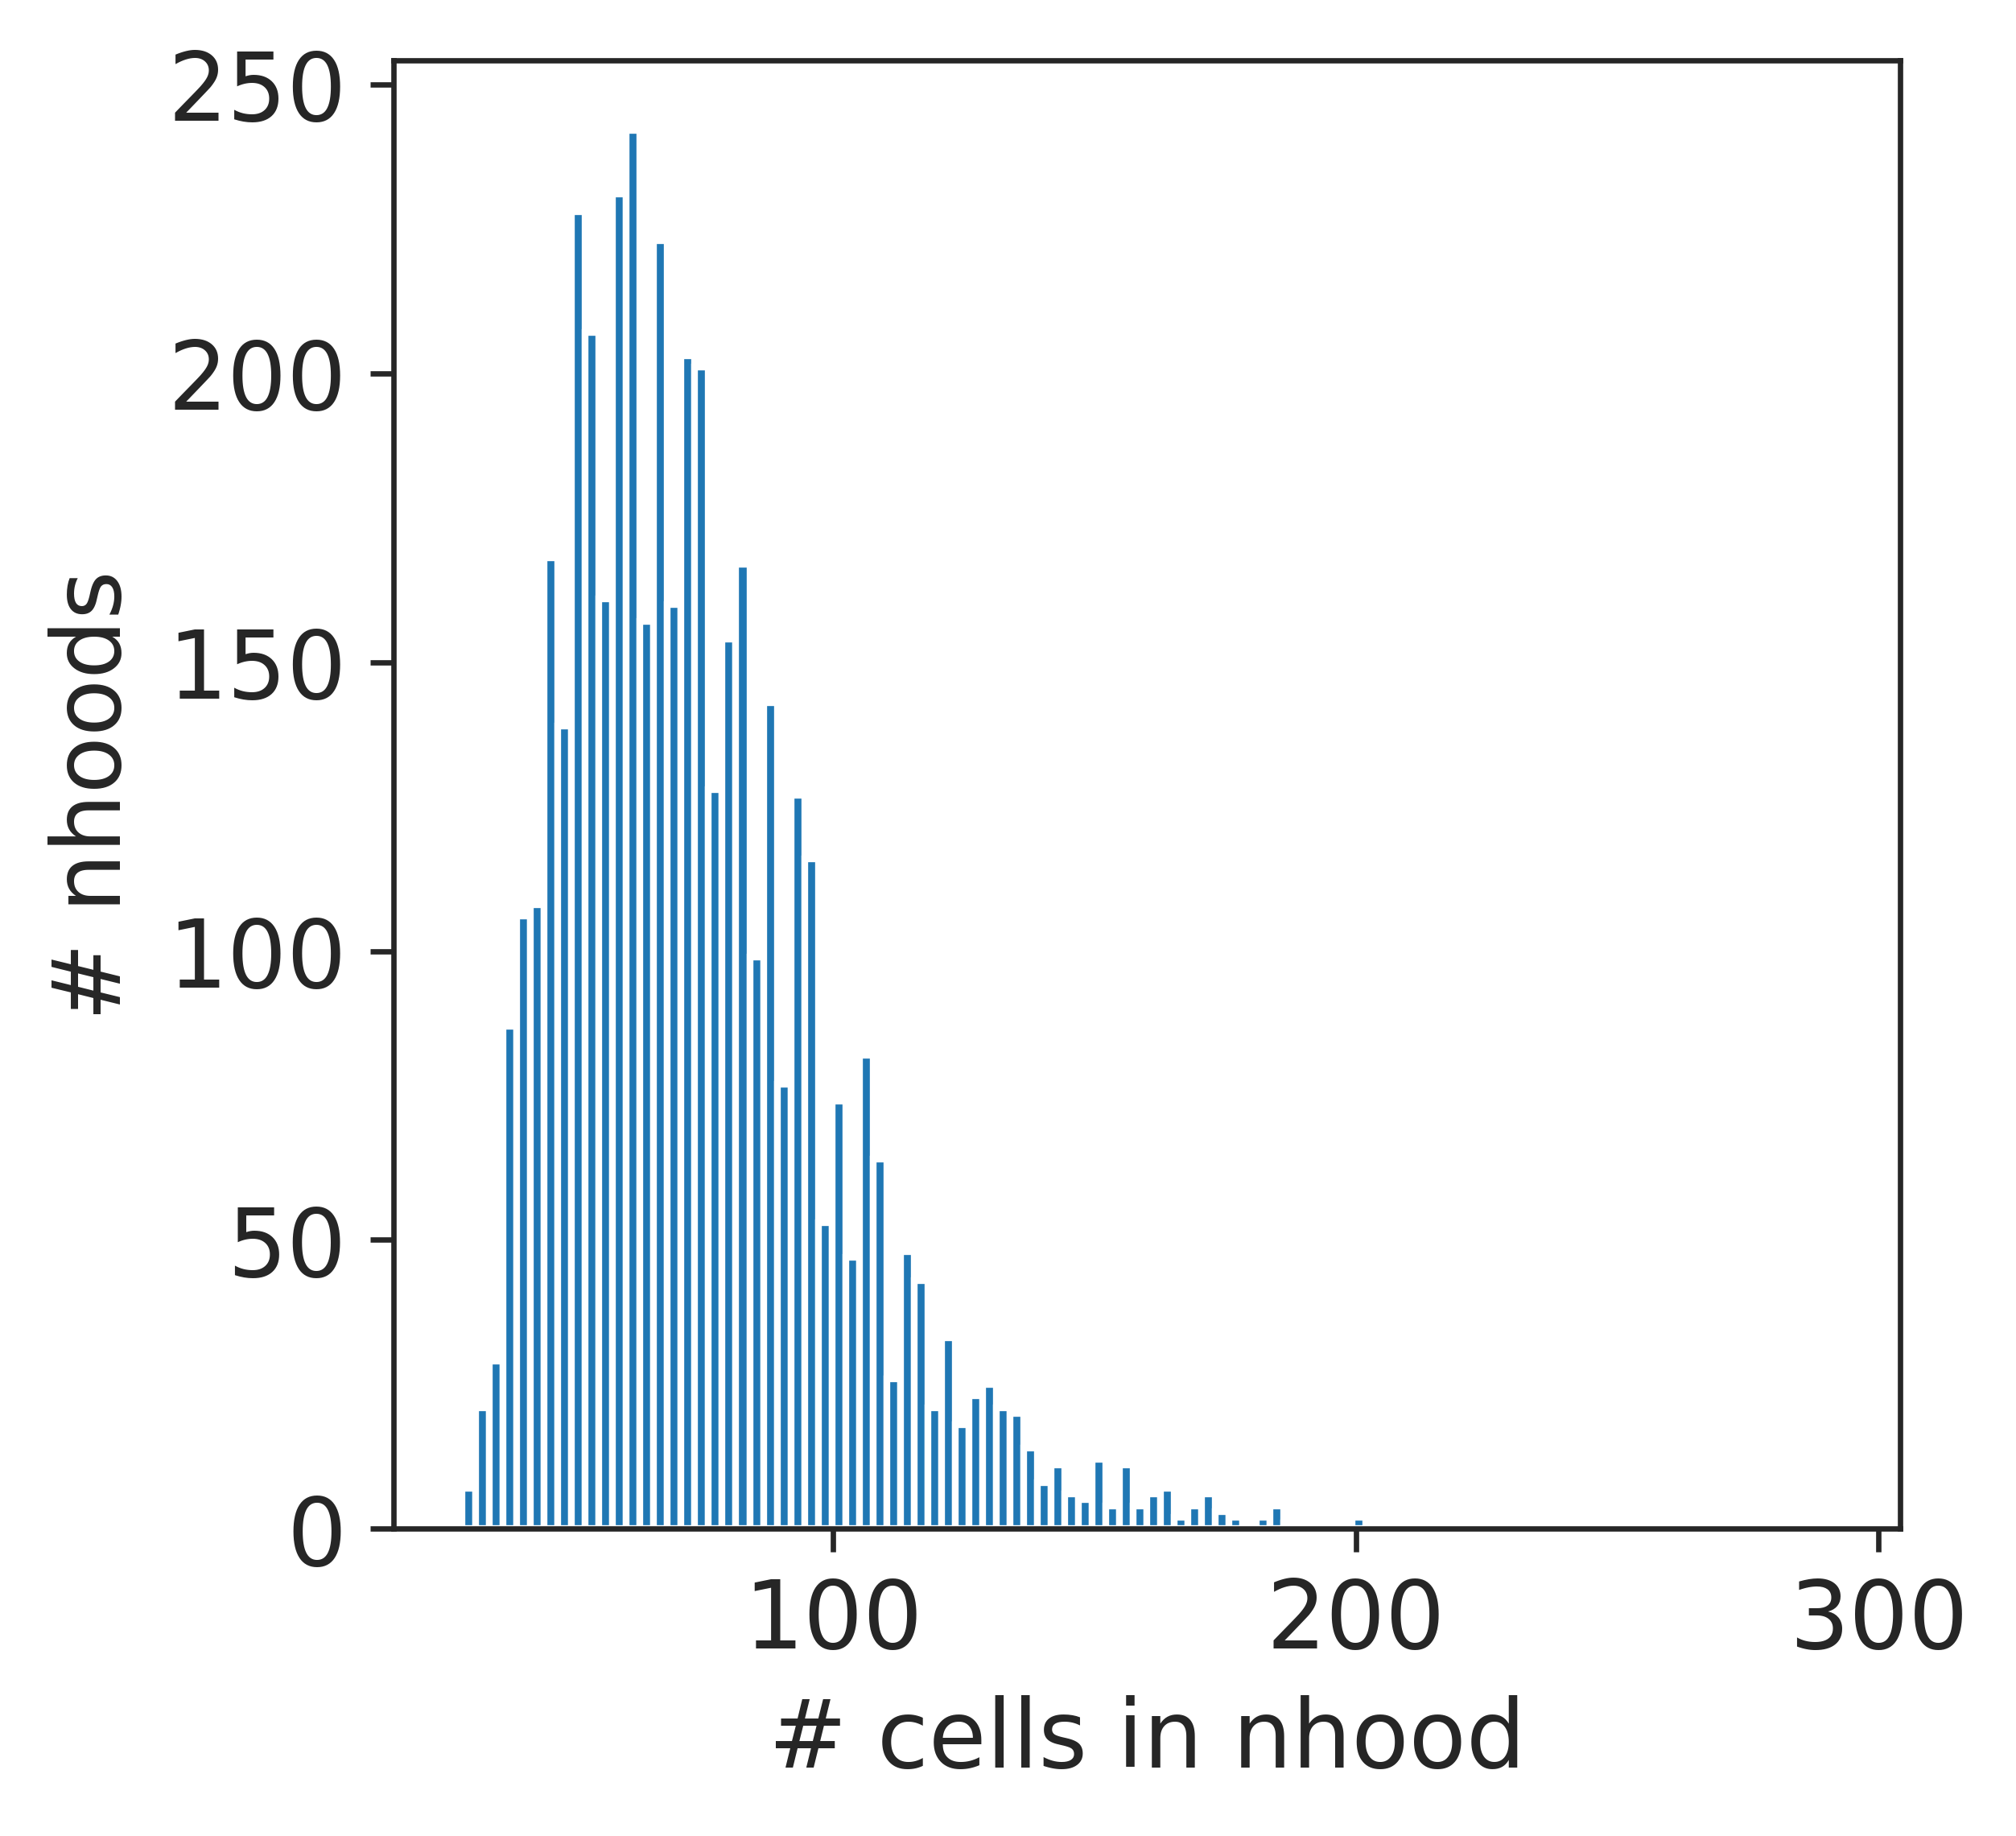

In [21]:
nhood_size = np.array(milo_data["rna"].obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100)
plt.xlabel("# cells in nhood")
plt.ylabel("# nhoods")

In [22]:
mdata = milo.count_nhoods(milo_data, sample_col="sample")

In [25]:
milo.da_nhoods(mdata, design="~treatment")

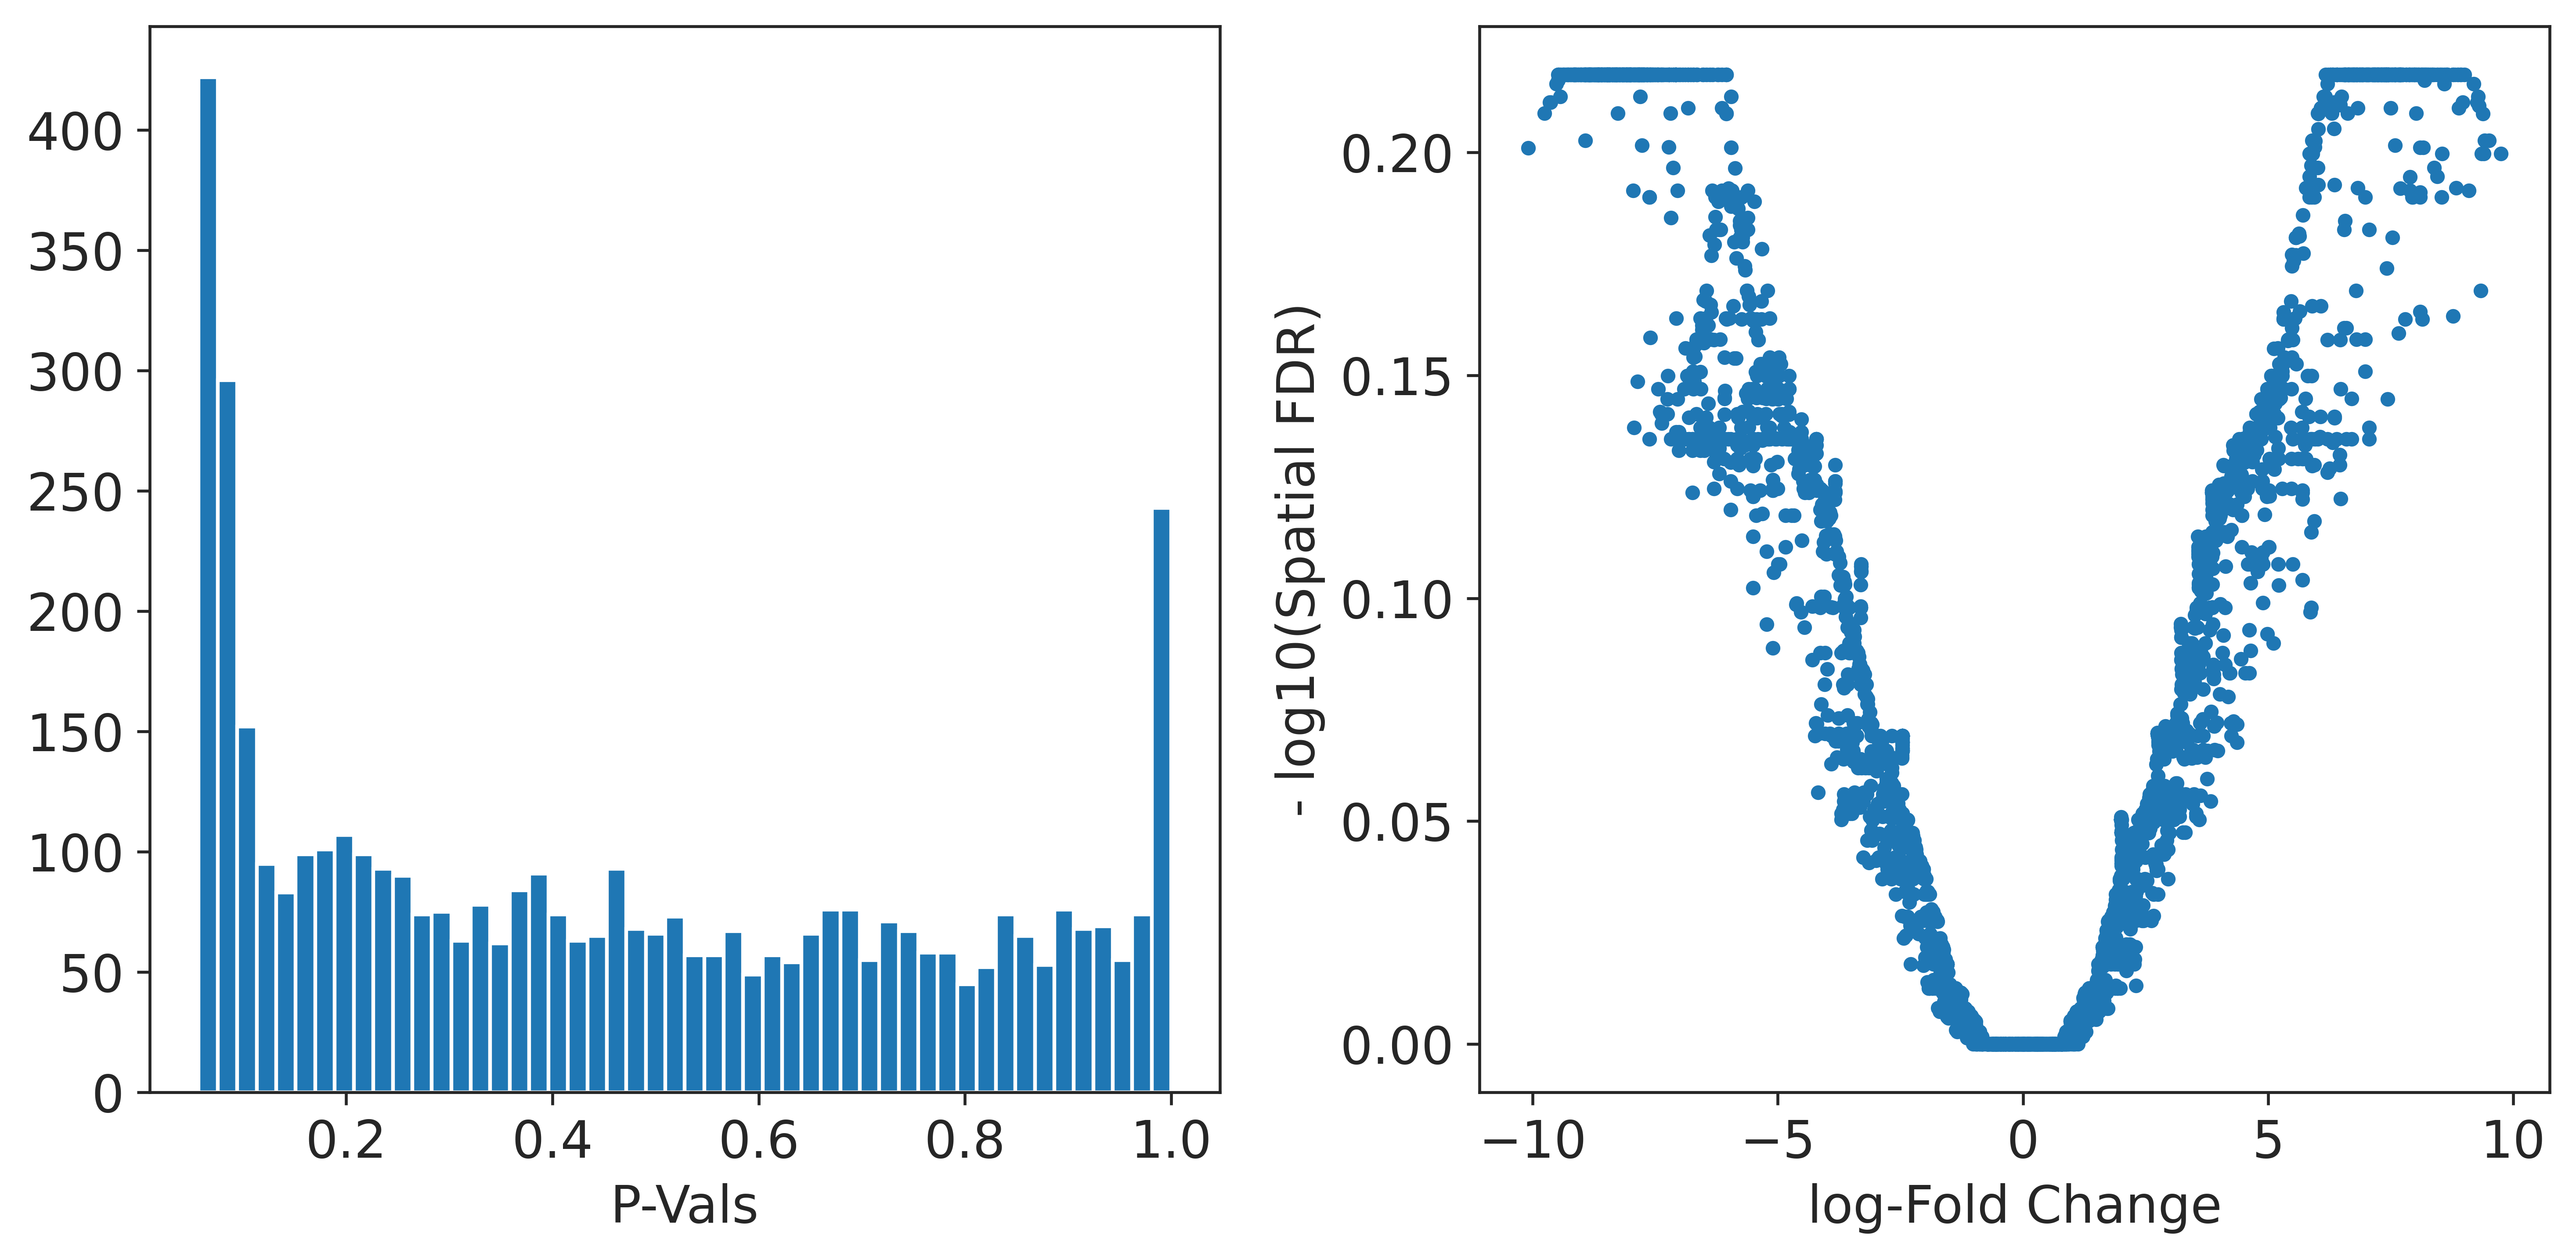

In [26]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.subplot(1, 2, 1)
plt.hist(mdata["milo"].var.PValue, bins=50)
plt.xlabel("P-Vals")
plt.subplot(1, 2, 2)
plt.plot(mdata["milo"].var.logFC, -np.log10(mdata["milo"].var.SpatialFDR), ".")
plt.xlabel("log-Fold Change")
plt.ylabel("- log10(Spatial FDR)")
plt.tight_layout()

In [27]:
milo.build_nhood_graph(mdata)

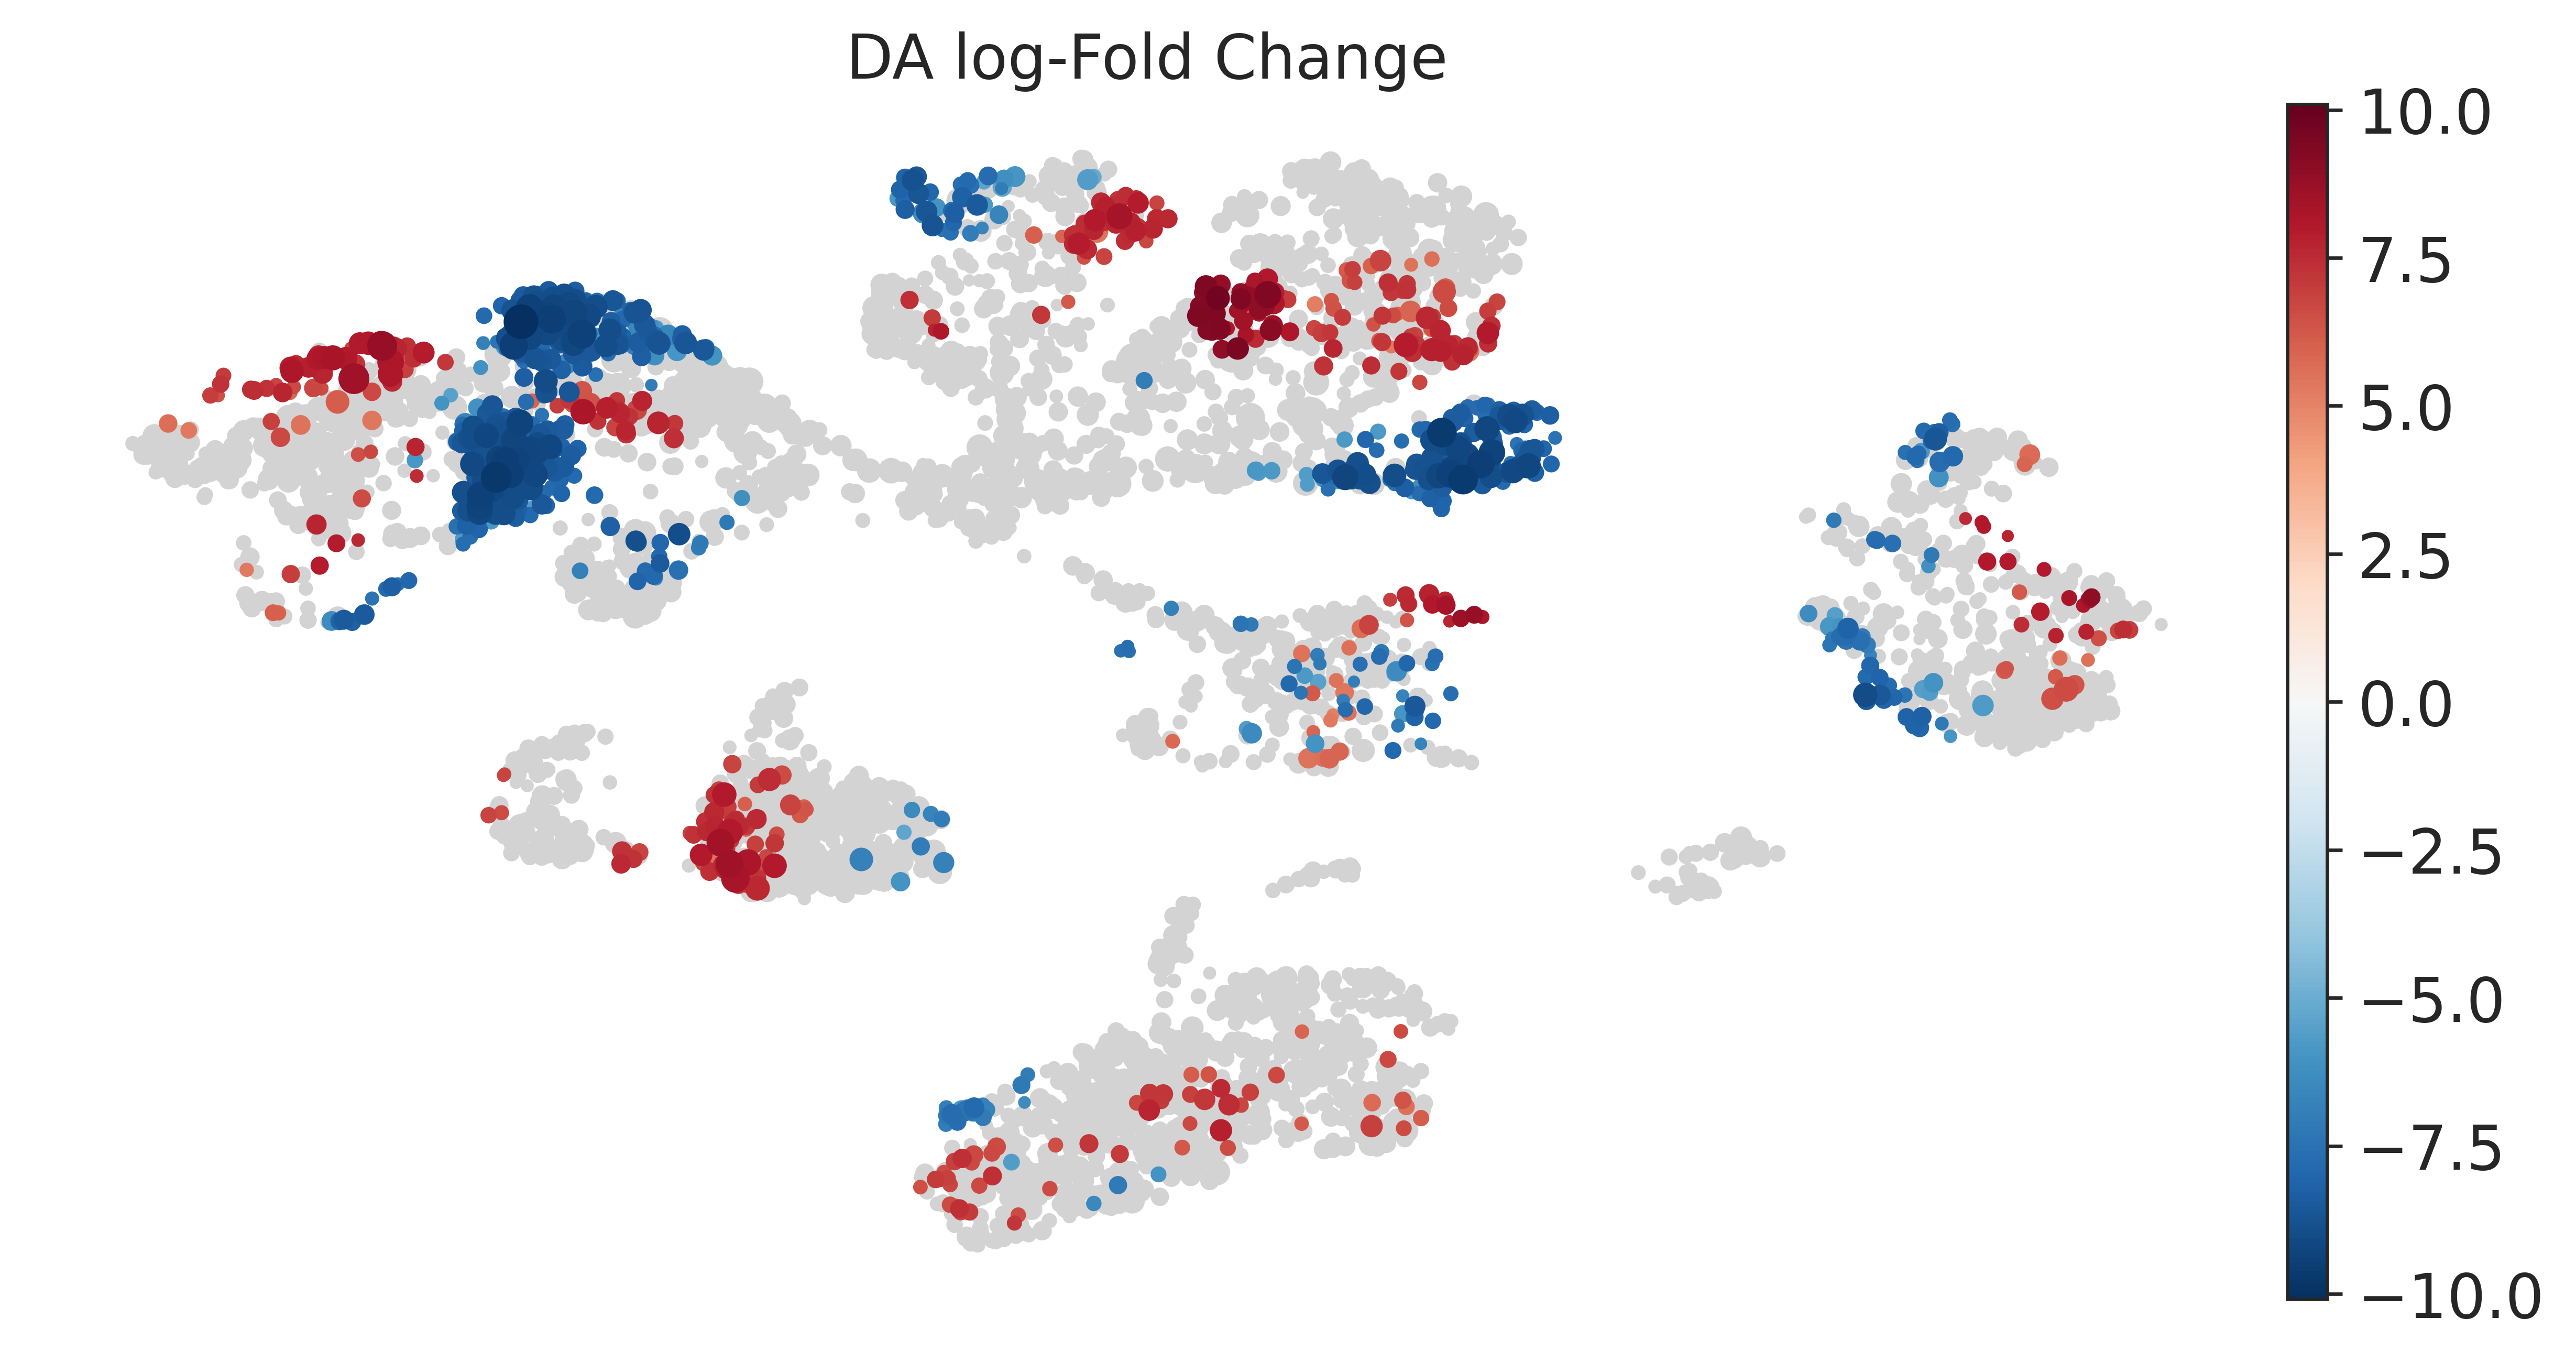

<Figure size 3000x1500 with 0 Axes>

In [28]:
milo.plot_nhood_graph(
    mdata,
    alpha=0.7,
    min_size=1,
)
plt.savefig("figures/milo_da_umap.png", bbox_inches="tight")

In [29]:
milo.annotate_nhoods(mdata, anno_col="cell_type")

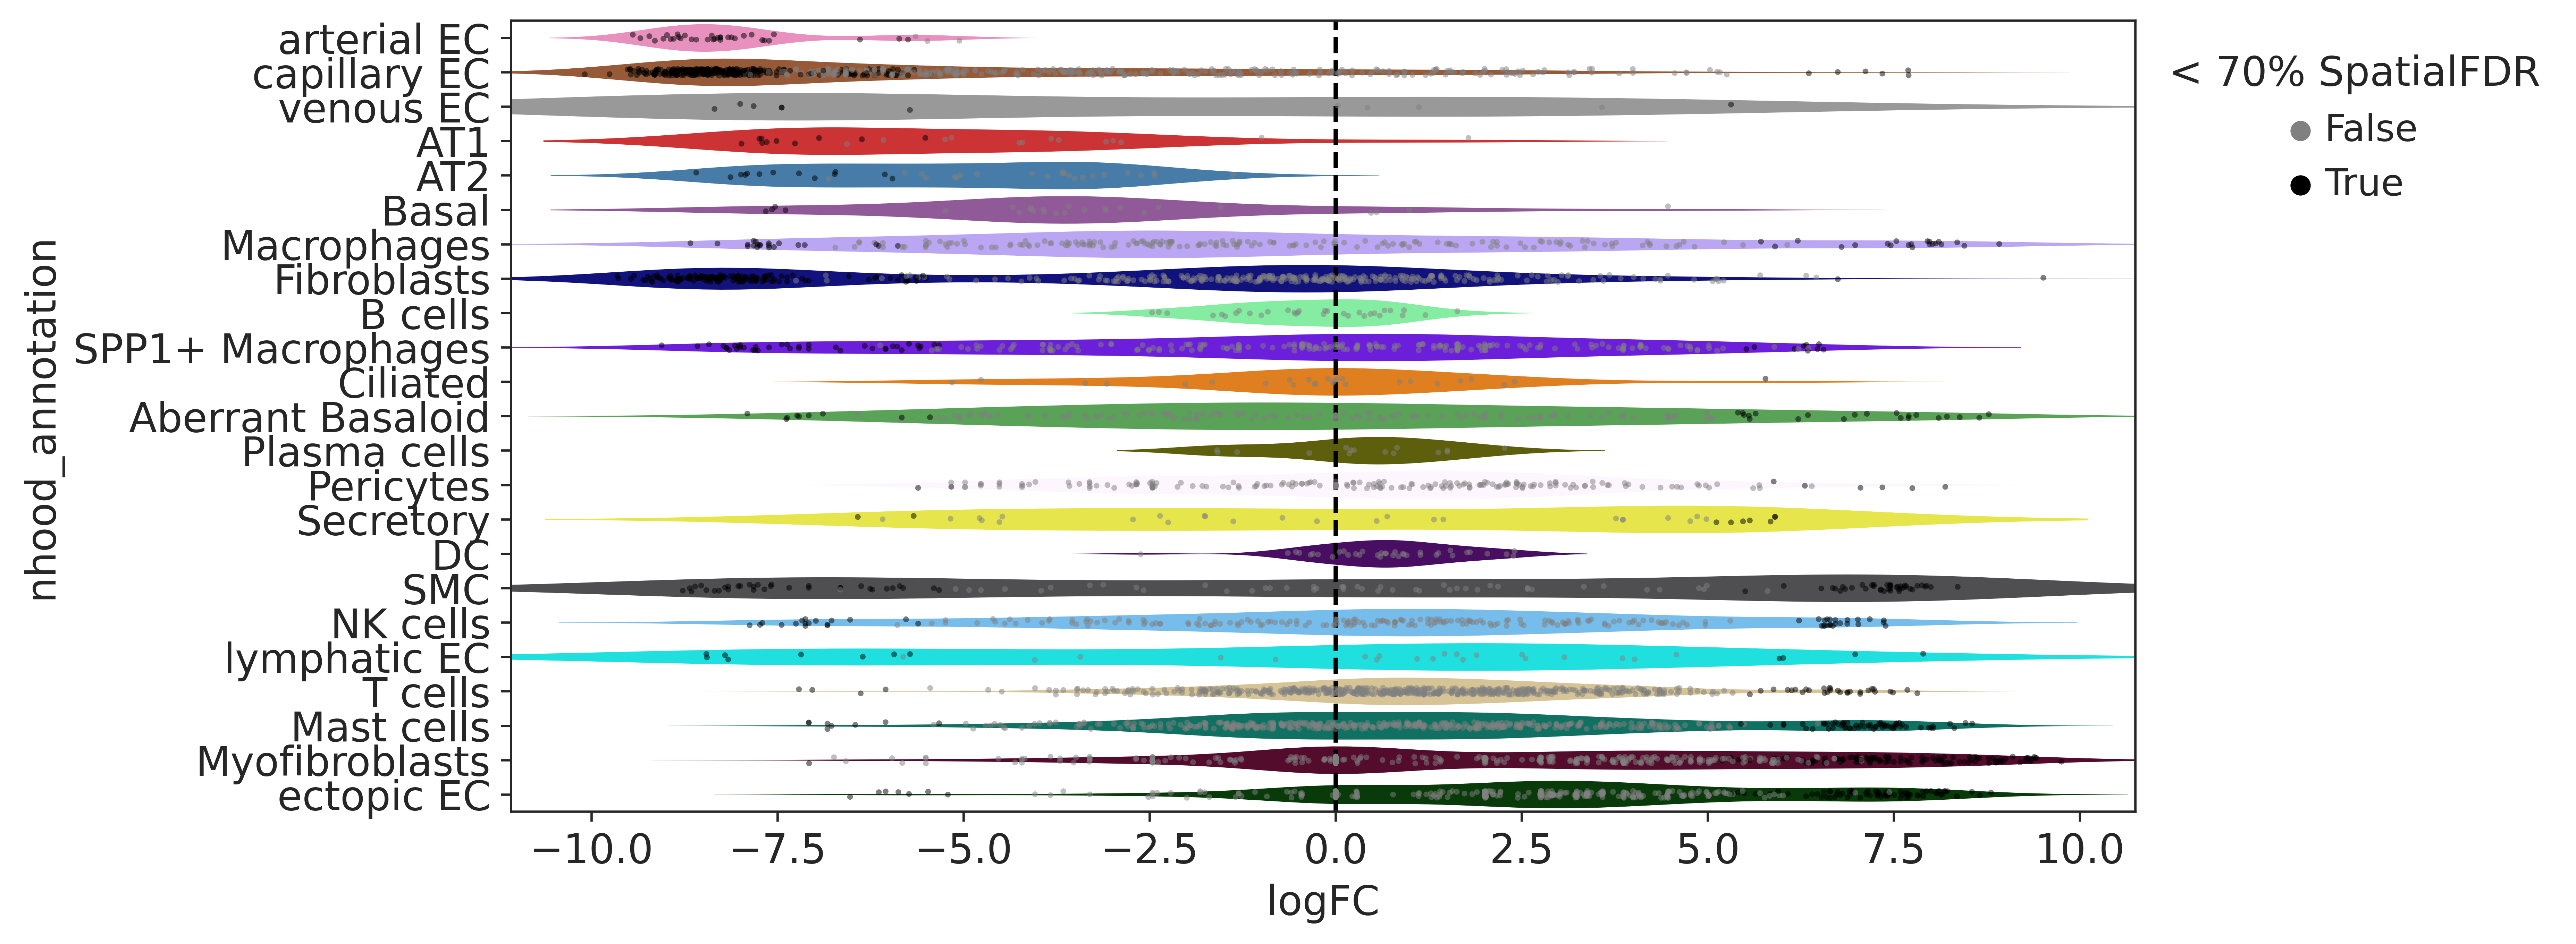

In [30]:
pt.pl.milo.da_beeswarm(mdata, alpha=0.7)